## install requirements

In [2]:
# pip install tensorflow opencv-python numpy

In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## imports 

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
# from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers

## Data preprocessing

In [5]:
def load_images(data_path):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    for label_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, label_name)
        if os.path.isdir(folder_path):
            # Assign label IDs
            if label_name not in label_map:
                label_map[label_name] = label_counter
                label_counter += 1

            for file_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
                images.append(img)
                labels.append(label_map[label_name])

    images = np.array(images) / 255.0  # Normalize pixel values
    labels = to_categorical(np.array(labels))  # Convert labels to categorical
    return images, labels, label_map

data_path = r"C:\Users\HP\Desktop\epic\data"  # Replace with the path to your dataset
images, labels, label_map = load_images(data_path)


print(f"completed processing {len(images)} images")

completed processing 400 images


## Splitting data into Test and Train

In [6]:
#xxxxxxxxxxxxxxxxxxxxxx-------------------------------removed because it is showing 100% accuracy------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# # Shuffle the dataset before splitting
# images, labels = shuffle(images, labels, random_state=42)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

#xxxxxxxxxxxxxxxxxxxxxx-------------------------------removed because it is showing 100% accuracy------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx





X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# printing lengths
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 320
Testing set size: 80


## Model building

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_map), activation='softmax')  # Number of students (labels)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [8]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

model.save('updated_cnn.h5')

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.1496 - loss: 2.0819 - val_accuracy: 0.3750 - val_loss: 2.0178
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3721 - loss: 1.9334 - val_accuracy: 0.5625 - val_loss: 1.3949
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5900 - loss: 1.2154 - val_accuracy: 0.8500 - val_loss: 0.5745
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.8716 - loss: 0.5763 - val_accuracy: 0.9000 - val_loss: 0.3150
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8723 - loss: 0.4102 - val_accuracy: 0.9125 - val_loss: 0.2284
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8808 - loss: 0.3165 - val_accuracy: 0.9000 - val_loss: 0.3533
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9115 - loss: 0.2368 - val_accuracy: 0.9750 - val_loss: 0.1022
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.9831 - loss: 0.0883 - val_accuracy: 0.9375 - 

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0022
Test Accuracy: 100.00%


## Model Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


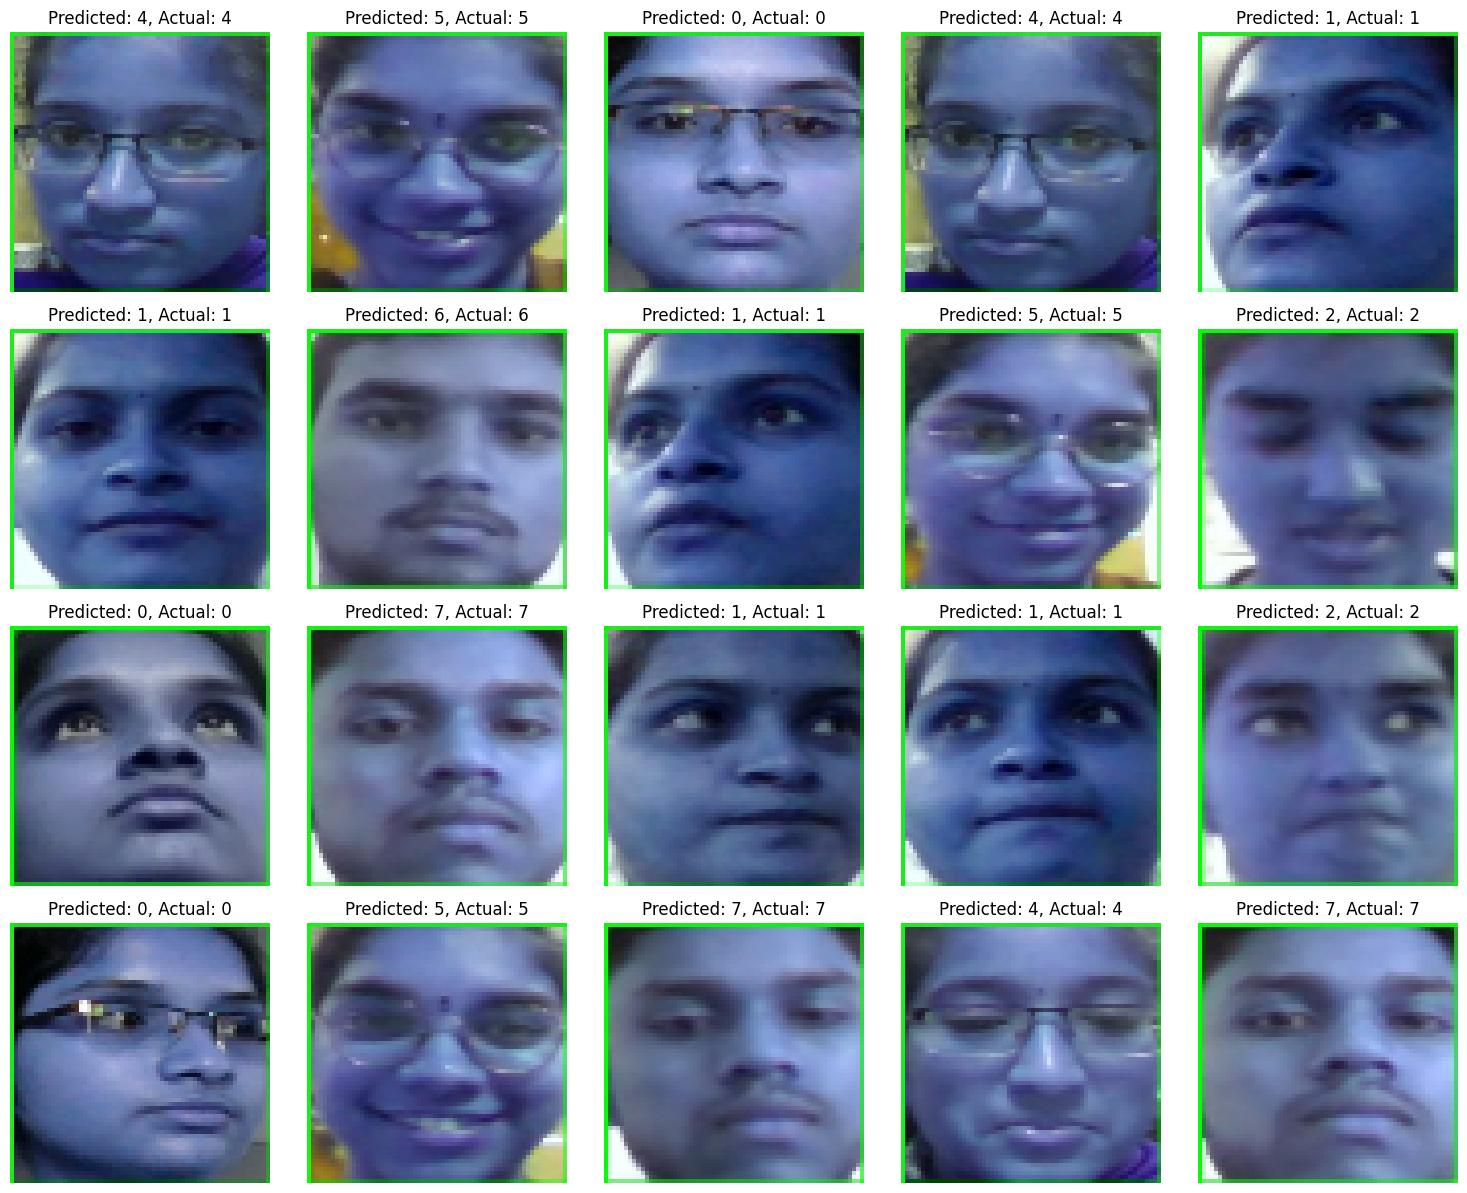

Accuracy: 100.00%
Error: 0.00%


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get predictions for the test set
predictions = model.predict(X_test)

# Convert predictions to class labels (assuming categorical output)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Display a few images with their predicted and actual labels
num_images = 20  # Number of images to display
plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('updated_cnntested.png')
plt.show()

# Calculate accuracy and error
accuracy = np.mean(predicted_labels == true_labels)
error = 1 - accuracy

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error: {error * 100:.2f}%")

## PLotting Graphs

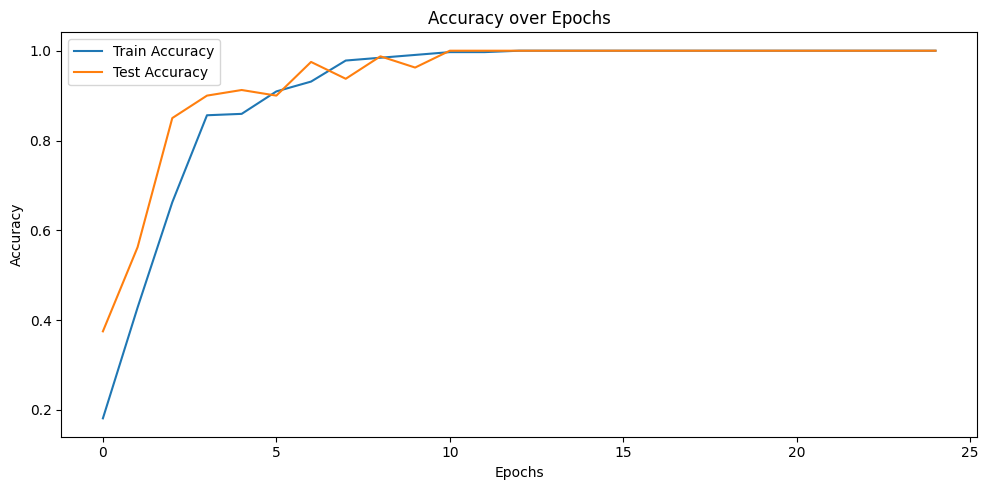

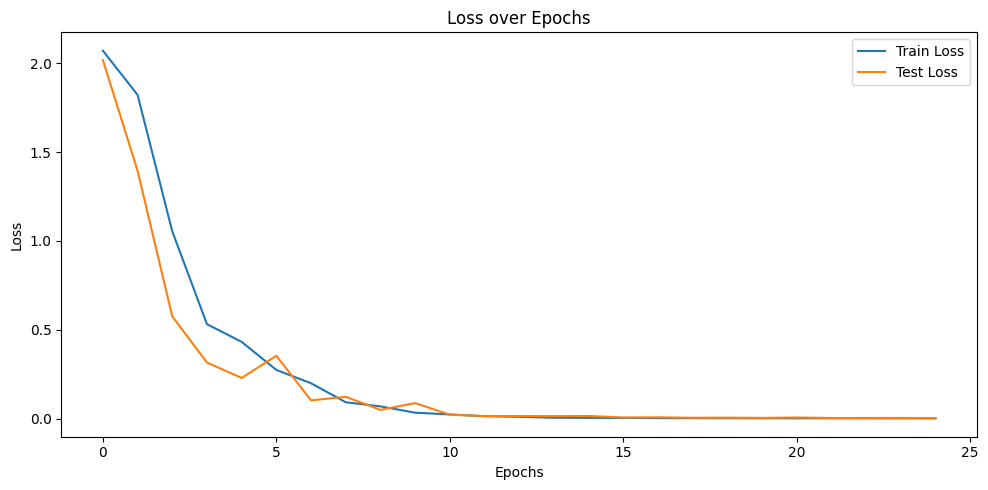

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('updated_cnn_accuracy_plot.png')  # Save accuracy plot
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('updated_cnn_loss_plot.png')  # Save loss plot
plt.show()


## Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


<Figure size 1000x1000 with 0 Axes>

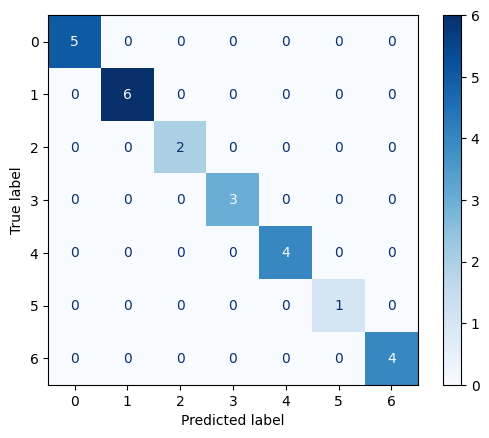

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Select the first 25 images from the test set (or use any subset of 25 images)
X_test_sample = X_test[:25]
y_test_sample = y_test[:25]

# Predict the class probabilities on the subset of the test set
y_pred = model.predict(X_test_sample)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert true labels to class labels (if they are one-hot encoded)
y_true = np.argmax(y_test_sample, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.savefig('updated_cnnmatrix.png')
plt.show()


## Preformance metrics

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')  # Adjust as needed
recall = recall_score(y_true, y_pred_classes, average='weighted')  # Adjust as needed
f1 = f1_score(y_true, y_pred_classes, average='weighted')  # Adjust as needed
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')  # For multi-class AUC

# Print metrics
print(f"Accuracy: {accuracy*100:.4f}%")
print(f"Precision: {precision*100:.4f}%")
print(f"Recall: {recall*100:.4f}%")
print(f"F1-Score: {f1*100:.4f}%")
print(f"AUC (ROC): {auc*100:.4f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Accuracy: 100.0000%
Precision: 100.0000%
Recall: 100.0000%
F1-Score: 100.0000%
AUC (ROC): 100.0000%


## Testing from live video

In [14]:
def recognize_face(frame):
    img = cv2.resize(frame, (64, 64)) / 255.0  # Resize to model input size
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    
    # Map back to student name
    student_name = list(label_map.keys())[list(label_map.values()).index(predicted_label)]
    return student_name

# Capture video from webcam
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Recognize face
    name = recognize_face(frame)
    cv2.putText(frame, name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    
    cv2.imshow("Face Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

## Logging attendance

In [17]:
import os
import cv2
import numpy as np
import pandas as pd
from datetime import datetime
from tensorflow.keras.preprocessing.image import img_to_array
from mtcnn import MTCNN
from tensorflow.keras.models import load_model

# Function to load and preprocess images
def load_images(data_path):
    images = []
    labels = []
    label_map = {}
    label_counter = 0

    for label_name in os.listdir(data_path):
        folder_path = os.path.join(data_path, label_name)
        if os.path.isdir(folder_path):
            # Assign label IDs
            if label_name not in label_map:
                label_map[label_name] = label_counter
                label_counter += 1

            for file_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, file_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (64, 64))  # Resize to 64x64 pixels
                images.append(img)
                labels.append(label_map[label_name])

    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return images, labels, label_map

# Function to capture an image using the webcam
def capture_class_image(camera_index=0):
    """
    Captures an image from the webcam.
    
    Parameters:
    - camera_index: The index of the camera (default is 0 for the first camera).
    
    Returns:
    - captured_img: The captured image from the webcam.
    """
    cap = cv2.VideoCapture(camera_index)  # Open the camera
    ret, frame = cap.read()  # Capture a frame
    if not ret:
        print("Failed to capture image.")
        return None
    cap.release()  # Release the camera after capturing the image
    return frame

# Function to mark attendance based on face recognition
def mark_attendance(model, excel_file_path, attendance_times, camera_index=0):
    """
    Marks attendance for the students based on the trained model and class image.
    
    Parameters:
    - model: The trained face recognition model.
    - excel_file_path: Path to the Excel file containing student roll numbers and attendance data.
    - attendance_times: A list of times when attendance needs to be taken.
    - camera_index: The index of the camera to capture the class image (default is 0).
    """
    
    # Get the current time
    current_time = datetime.now().strftime('%H:%M')
    # Get the current date
    date = datetime.now().strftime('%Y-%m-%d')
    
    # If current time matches one of the times in attendance_times, take attendance
    if current_time in attendance_times:
        print(f"Taking attendance at {current_time}...")

        # Capture the class image using the webcam
        class_img = capture_class_image(camera_index)
        if class_img is None:
            print("No image captured.")
            return

        # Detect faces using MTCNN
        detector = MTCNN()
        faces = detector.detect_faces(class_img)
        
        if len(faces) == 0:
            print("No faces detected.")
            return

        # Preprocess faces for recognition (like in load_images function)
        embeddings = []
        for face in faces:
            x, y, width, height = face['box']
            face_img = class_img[y:y+height, x:x+width]
            face_img = cv2.resize(face_img, (64, 64))  # Resize to 64x64 pixels
            face_img = face_img / 255.0  # Normalize image as in the load_images function
            embeddings.append(face_img)

        embeddings = np.array(embeddings)

        # Predict roll numbers using the trained model
        predictions = model.predict(embeddings)
        recognized_rollnos = [np.argmax(pred) for pred in predictions]
        print(f"Recognized Roll Numbers: {recognized_rollnos}")

        # Load the Excel file containing the attendance sheet
        df = pd.read_excel(excel_file_path)

        # Add a column for today's date if it doesn't exist
        if date not in df.columns:
            df[date] = "Absent"  # Default to "Absent" for all

        # Mark attendance for the current period (based on current hour)
        period = f"Period{datetime.now().hour}"

        # Add a period column if it doesn't exist
        if period not in df.columns:
            df[period] = "Absent"  # Default to "Absent" for the period

        # Mark attendance based on recognized roll numbers
        for roll_no in df['Roll No']:
            if roll_no in recognized_rollnos:
                df.loc[df['Roll No'] == roll_no, period] = "Present"  # Mark "Present"
            else:
                df.loc[df['Roll No'] == roll_no, period] = "Absent"  # Mark "Absent"

        # Save updated attendance to Excel
        df.to_excel(excel_file_path, index=False)
        print(f"Attendance marked for {date} at {period}")
    else:
        print(f"No attendance needed at {current_time}.")

# Example usage
attendance_times = ["06:31", "06:32", "09:58", "09:59", "10:33", "19:10", "06:34"]  # List of times to take attendance
excel_file_path = r"C:\Users\HP\Desktop\epic\updated_cnnattendance.xlsx"  # Path to your Excel file

# Load your trained model
model = load_model(r"C:\Users\HP\Desktop\epic\updated_cnn.h5")  # Replace with your actual model path

# Function call to mark attendance
mark_attendance(model, excel_file_path, attendance_times)


Taking attendance at 10:33...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
Recognized Roll Numbers: [0]
Attendance marked for 2024-11-27 at Period10


In [15]:
# model = load_model(r"C:\Users\HP\Desktop\epic\updated_cnn.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 684,234 (2.61 MB)

 Trainable params: 684,232 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)